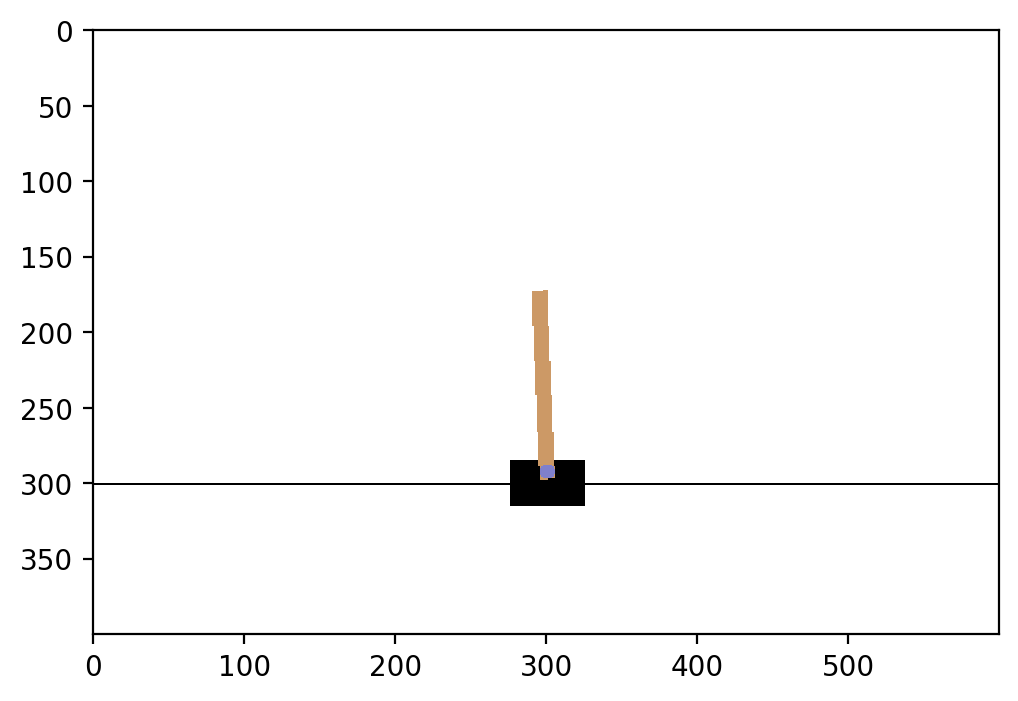

In [75]:
import gym
import random
import numpy as np
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from statistics import mean, median
from collections import Counter
from time import sleep

import matplotlib
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.rcParams['figure.dpi'] = 100

LR = 1e-3

env = gym.make('CartPole-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once

def some_random_games_first() :
    for episode in range(5) :
        env.reset()
       
        for t in range(goal_steps) :
            #env.render()
            render(env) 
            action = env.action_space.sample()
            observation, reward, done, info = env.step(action)
           
            if done:
                break

def render(env):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())    
    display.clear_output(wait=True)
    env.step(env.action_space.sample())

def initial_population() :
    training_data = []
    scores = []
    accepted_scores = []
    
    for _ in range(initial_games):
        score = 0
        game_memory = []
        prev_observation = []
        
        for _ in range(goal_steps):
            action = random.randrange(0, 2)
            observation, reward, done, info = env.step(action)
            
            if len(prev_observation) > 0:
                game_memory.append([prev_observation, action])
                
            prev_observation = observation
            score += reward
            
            if done:
                break
                
        if score >= score_requirements:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0,1]
                elif data[1] == 0:
                    output = [1,0]
                    
                training_data.append([data[0], output])
            
        env.reset()
        scores.append(score)
        
        
    training_data_save = np.array(training_data)
    np.save('saved.npy', training_data_save)
    
    print('Average Accepted Score: ', mean(accepted_scores))
    print('Median Accepted Score: ', median(accepted_scores))
    print(Counter(accepted_scores))
    
    return training_data
    

    
def neural_network_model(input_size):
    network = input_data(shape=[None, input_size,1], name='input')
    
    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 512, activation='relu')
    network = dropout(network, 0.8)

    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)    

    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)
    
    network = fully_connected(network, 2, activation='softmax')
    network = regression(network, optimizer = 'adam', learning_rate = LR, loss='categorical_crossentropy', name='targets')
    
    model = tflearn.DNN(network, tensorboard_dir='log')
    return model
    
def train_model(training_data, model=False):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]), 1)
    y = [i[1] for i in training_data]
    
    if not model:
        model = neural_network_model(input_size=len(X[0]))
    
    model.fit({'input':X},{'targets' : y}, n_epoch=n_epoch, snapshot_step=500, show_metric=True, run_id='openaicartpole')
    
    return model
           


In [76]:
goal_steps = 500
score_requirements = 50
initial_games = 100000
n_epoch=3

KeyboardInterrupt: 

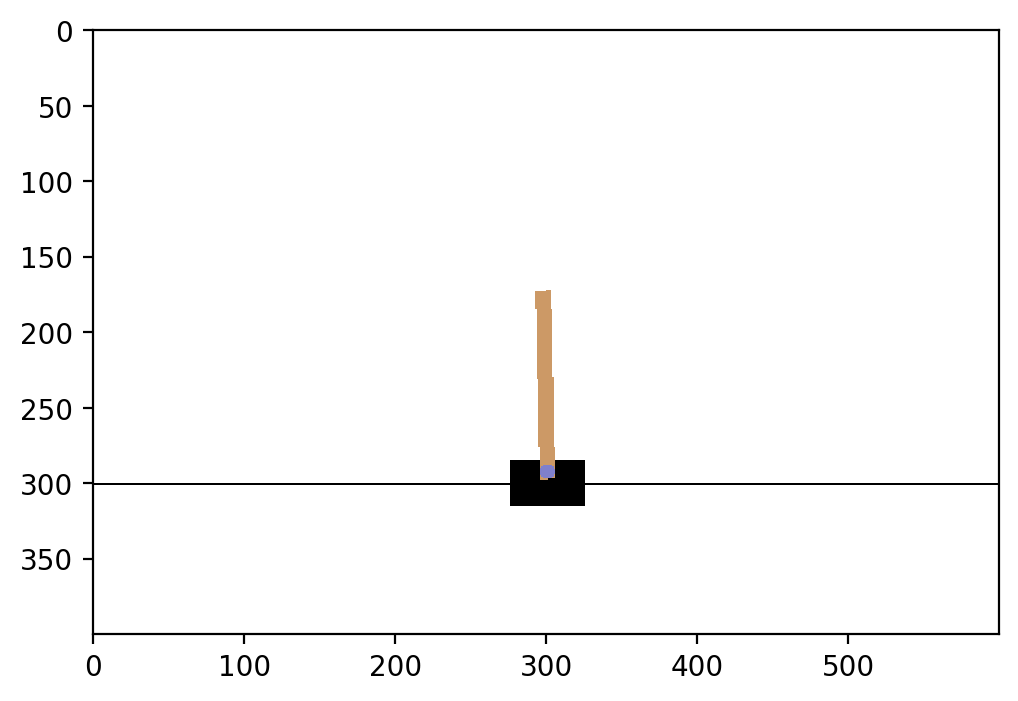

In [78]:
some_random_games_first()

In [79]:
training_data = initial_population()


Average Accepted Score:  61.454670708184075
Median Accepted Score:  58.0
Counter({50.0: 299, 51.0: 248, 52.0: 243, 53.0: 226, 54.0: 225, 57.0: 189, 56.0: 186, 55.0: 183, 58.0: 165, 59.0: 128, 60.0: 115, 62.0: 109, 61.0: 103, 65.0: 96, 63.0: 90, 64.0: 84, 66.0: 81, 67.0: 67, 72.0: 65, 69.0: 62, 68.0: 58, 70.0: 46, 71.0: 43, 77.0: 42, 74.0: 38, 78.0: 34, 75.0: 33, 73.0: 30, 76.0: 28, 82.0: 26, 79.0: 26, 81.0: 20, 85.0: 20, 83.0: 19, 80.0: 18, 87.0: 18, 88.0: 17, 89.0: 12, 84.0: 12, 91.0: 10, 92.0: 8, 90.0: 8, 98.0: 8, 97.0: 7, 93.0: 7, 96.0: 7, 94.0: 6, 106.0: 5, 103.0: 4, 86.0: 4, 104.0: 4, 108.0: 4, 101.0: 3, 113.0: 3, 109.0: 3, 111.0: 3, 105.0: 3, 107.0: 3, 121.0: 3, 100.0: 2, 95.0: 2, 99.0: 2, 119.0: 2, 155.0: 1, 167.0: 1, 144.0: 1, 138.0: 1, 161.0: 1, 123.0: 1, 157.0: 1, 128.0: 1, 124.0: 1, 114.0: 1, 137.0: 1, 126.0: 1, 102.0: 1, 139.0: 1})


In [81]:
training_data

[[array([-0.04653075, -0.23226737,  0.01319554,  0.30063856]), [0, 1]],
 [array([-0.05117609, -0.03733596,  0.01920831,  0.01214628]), [1, 0]],
 [array([-0.05192281, -0.23272804,  0.01945123,  0.31082723]), [0, 1]],
 [array([-0.05657737, -0.03788854,  0.02566778,  0.02434156]), [0, 1]],
 [array([-0.05733514,  0.15685609,  0.02615461, -0.26013366]), [0, 1]],
 [array([-0.05419802,  0.3515951 ,  0.02095194, -0.54445369]), [1, 0]],
 [array([-0.04716612,  0.15618509,  0.01006286, -0.24524359]), [0, 1]],
 [array([-0.04404242,  0.35116188,  0.00515799, -0.53473553]), [1, 0]],
 [array([-0.03701918,  0.15596778, -0.00553672, -0.24043183]), [1, 0]],
 [array([-0.03389983, -0.03907465, -0.01034536,  0.05049953]), [0, 1]],
 [array([-0.03468132,  0.15619411, -0.00933537, -0.24542941]), [0, 1]],
 [array([-0.03155744,  0.35144814, -0.01424395, -0.54104225]), [1, 0]],
 [array([-0.02452847,  0.15652927, -0.0250648 , -0.25288118]), [1, 0]],
 [array([-0.02139789, -0.03822598, -0.03012242,  0.03179165]), [

In [83]:
model = train_model(training_data)

---------------------------------
Run id: openaicartpole
Log directory: log/
---------------------------------
Training samples: 1974510
Validation samples: 0
--


InvalidArgumentError: You must feed a value for placeholder tensor 'targets_1/Y' with dtype float and shape [?,2]
	 [[node targets_1/Y (defined at /home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tflearn/layers/estimator.py:101) ]]

Original stack trace for 'targets_1/Y':
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-140b6db782f7>", line 1, in <module>
    model = train_model(training_data)
  File "<ipython-input-1-d63f451cb98c>", line 119, in train_model
    model = neural_network_model(input_size=len(X[0]))
  File "<ipython-input-1-d63f451cb98c>", line 109, in neural_network_model
    network = regression(network, optimizer = 'adam', learning_rate = LR, loss='categorical_crossentropy', name='targets')
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tflearn/layers/estimator.py", line 101, in regression
    placeholder = tf.placeholder(shape=p_shape, dtype=dtype, name="Y")
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 6262, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/loganathan001/jupyter/jupytern_env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [3]:
model.save('cartpolemodel.model')

In [11]:
model = neural_network_model(input_size=len(training_data[0][0]))
model = model.load('cartpolemodel.model')

[[array([-0.02157871, -0.18311995, -0.02435179,  0.25699178]), [1, 0]],
 [array([-0.02524111, -0.37788592, -0.01921195,  0.54189539]), [0, 1]],
 [array([-0.03279883, -0.18249928, -0.00837404,  0.24322157]), [1, 0]],
 [array([-0.03644882, -0.37750063, -0.00350961,  0.53325139]), [0, 1]],
 [array([-0.04399883, -0.18232949,  0.00715542,  0.23946466]), [1, 0]],
 [array([-0.04764542, -0.37755293,  0.01194471,  0.534396  ]), [1, 0]],
 [array([-0.05519648, -0.5728408 ,  0.02263263,  0.83081857]), [0, 1]],
 [array([-0.06665329, -0.37803538,  0.039249  ,  0.54533871]), [0, 1]],
 [array([-0.074214  , -0.18348628,  0.05015578,  0.26527603]), [0, 1]],
 [array([-0.07788373,  0.01088527,  0.0554613 , -0.01117502]), [0, 1]],
 [array([-0.07766602,  0.20516978,  0.0552378 , -0.28585643]), [0, 1]],
 [array([-0.07356262,  0.39946221,  0.04952067, -0.56061892]), [0, 1]],
 [array([-0.06557338,  0.59385545,  0.03830829, -0.8372982 ]), [1, 0]],
 [array([-0.05369627,  0.39823183,  0.02156232, -0.53281817]), [

In [ ]:
scores = []
choices = []

env.reset()

for each_game in range(10):
    score = 0
    game_memory = []
    prev_obs = []
    env.reset()
    
    for _ in range(goal_steps):
        #env.render()
        render(env) # just update the data        

        
        if len(prev_obs) == 0 :
            action = random.randrange(0,2)
        else:
            action = np.argmax(model.predict(prev_obs.reshape(-1, len(prev_obs), 1))[0])
            
        choices.append(action)
        
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        game_memory.append([new_observation, action])
        score += reward
        if done:
            break
        
    scores.append(score)

print('Average score: ', sum(scores)/len(scores))
print('Choice 1: {}, Choice 2: {}'.format(choices.count(1)/len(choices), 
     choices.count(0)/len(choices)))

env.close()